In [103]:
import pandas as pd #导入pandas数据处理库
from sklearn.preprocessing import StandardScaler #导入标准差标准化函数
from sklearn.cluster import KMeans #导入聚类函数
from display import plot    # 导入自定义的绘图模块
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

#1.1数据探索：展示原始数据的尺寸
data1 = pd.read_csv('data1.csv', encoding='gb18030')  # 以指定格式读取数据
data2 = pd.read_csv('data2.csv', encoding='gb18030')  # 以指定格式读取数据
print('data1原始数据的尺寸为：',data1.shape) #显示原始数据的行数和列数
print('data2原始数据的尺寸为：',data2.shape) #显示原始数据的行数和列数

data1原始数据的尺寸为： (4341, 5)
data2原始数据的尺寸为： (519367, 12)


In [104]:
exp1 = data2['Money'].notnull()
#exp2 = data[''].notnull()
data2_notnull = data2[exp1 ]
print('删除缺失记录后数据的尺寸为：',data2_notnull.shape)

删除缺失记录后数据的尺寸为： (519367, 12)


In [105]:
'''
处理异常值1.2.1： 清除消费金额为负数的消费记录
'''
index1 = data2['Money'] < 0
data3 = data2[-(index1)]
print('删除消费金额为负数常记录后数据的尺寸为：',data3.shape)

删除消费金额为负数常记录后数据的尺寸为： (519367, 12)


In [106]:
print(data3['Date'].dtype)

object


In [107]:
#将“Date转换为时间类型数据”
data3['Date']=pd.to_datetime(data3['Date'])
print(data3['Date'].dtype)

datetime64[ns]


In [108]:
#在data3新增一列“hour”
data3['hour']=data3['Date'].dt.hour
print(data3['hour'])
print(data3.columns)

0         20
1          8
2          7
3          7
4         22
5         12
6         17
7         11
8         11
9         12
10        12
11        18
12        18
13        18
14        11
15        20
16        20
17        18
18        18
19         8
20         9
21        18
22         8
23        12
24        12
25        11
26        11
27        11
28        11
29        12
          ..
519337    11
519338    11
519339     7
519340    18
519341    15
519342    15
519343     7
519344    12
519345    11
519346     7
519347     7
519348    17
519349    16
519350    21
519351    11
519352    12
519353    18
519354     7
519355     7
519356    17
519357     7
519358    12
519359    11
519360     7
519361     7
519362    17
519363    17
519364     7
519365     7
519366    11
Name: hour, Length: 519367, dtype: int64
Index(['Index', 'CardNo', 'PeoNo', 'Date', 'Money', 'FundMoney', 'Surplus',
       'CardCount', 'Type', 'TermSerNo', 'conOperNo', 'Dept', 'hour'],
      dtype='object

In [109]:
'''
处理异常值1.2.2： 清除消费时间为半夜（23:00——06:00）的消费记录
'''
data4=data3[(data3['hour']>=6) & (data3['hour']<23)]


In [110]:
#将data1和经过处理得到的data4外连接
data5 = pd.merge(data1,data4,how='outer',left_on='CardNo',right_on='CardNo')
data5

,Index_x,CardNo,Sex,Major,AccessCardNo,Index_y,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermSerNo,conOperNo,Dept,hour
0,1.0,180001,男,18国际金融,19762330.0,117331517.0,20181.0,2019-04-21 18:30:00,7.00,0.0,28.40,206.0,消费,NaN,NaN,第四食堂,18.0
1,1.0,180001,男,18国际金融,19762330.0,117341866.0,20181.0,2019-04-22 09:40:00,3.50,0.0,24.90,207.0,消费,NaN,NaN,第一食堂,9.0
2,1.0,180001,男,18国际金融,19762330.0,117154618.0,20181.0,2019-04-10 16:42:00,11.00,0.0,2.70,189.0,消费,NaN,NaN,第四食堂,16.0
3,1.0,180001,男,18国际金融,19762330.0,117200032.0,20181.0,2019-04-15 11:43:00,7.00,0.0,43.20,192.0,消费,NaN,NaN,第四食堂,11.0
4,1.0,180001,男,18国际金融,19762330.0,117206146.0,20181.0,2019-04-15 07:50:00,2.50,0.0,50.20,191.0,消费,NaN,NaN,第一食堂,7.0
5,1.0,180001,男,18国际金融,19762330.0,117367323.0,20181.0,2019-04-23 09:52:00,2.00,0.0,15.90,209.0,消费,NaN,NaN,第二食堂,9.0
6,1.0,180001,男,18国际金融,19762330.0,117378955.0,20181.0,2019-04-23 11:53:00,7.00,0.0,8.90,210.0,消费,NaN,NaN,第四食堂,11.0
7,1.0,180001,男,18国际金融,19762330.0,117380758.0,20181.0,2019-04-22 17:42:00,7.00,0.0,17.90,208.0,消费,NaN,NaN,第四食堂,17.0
8,1.0,180001,男,18国际金融,19762330.0,117222956.0,20181.0,2019-04-16 07:44:00,1.60,0.0,32.60,195.0,消费,NaN,NaN,第二食堂,7.0
9,1.0,180001,男,18国际金融,19762330.0,117229404.0,20181.0,2019-04-16 07:46:00,2.00,0.0,30.60,196.0,消费,NaN,NaN,第二食堂,7.0


In [111]:
# 3.1.1计算本月人均刷卡频次
# 3.1.2计算人均消费
#  2.获取2018级学生的消费数据
data7=data5[(data5['CardNo']>=180000) & (data5['CardNo']<190000)]
data7

,Index_x,CardNo,Sex,Major,AccessCardNo,Index_y,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermSerNo,conOperNo,Dept,hour
0,1.0,180001,男,18国际金融,19762330.0,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.40,206.0,消费,NaN,NaN,第四食堂,18.0
1,1.0,180001,男,18国际金融,19762330.0,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.90,207.0,消费,NaN,NaN,第一食堂,9.0
2,1.0,180001,男,18国际金融,19762330.0,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.70,189.0,消费,NaN,NaN,第四食堂,16.0
3,1.0,180001,男,18国际金融,19762330.0,117200032.0,20181.0,2019-04-15 11:43:00,7.0,0.0,43.20,192.0,消费,NaN,NaN,第四食堂,11.0
4,1.0,180001,男,18国际金融,19762330.0,117206146.0,20181.0,2019-04-15 07:50:00,2.5,0.0,50.20,191.0,消费,NaN,NaN,第一食堂,7.0
5,1.0,180001,男,18国际金融,19762330.0,117367323.0,20181.0,2019-04-23 09:52:00,2.0,0.0,15.90,209.0,消费,NaN,NaN,第二食堂,9.0
6,1.0,180001,男,18国际金融,19762330.0,117378955.0,20181.0,2019-04-23 11:53:00,7.0,0.0,8.90,210.0,消费,NaN,NaN,第四食堂,11.0
7,1.0,180001,男,18国际金融,19762330.0,117380758.0,20181.0,2019-04-22 17:42:00,7.0,0.0,17.90,208.0,消费,NaN,NaN,第四食堂,17.0
8,1.0,180001,男,18国际金融,19762330.0,117222956.0,20181.0,2019-04-16 07:44:00,1.6,0.0,32.60,195.0,消费,NaN,NaN,第二食堂,7.0
9,1.0,180001,男,18国际金融,19762330.0,117229404.0,20181.0,2019-04-16 07:46:00,2.0,0.0,30.60,196.0,消费,NaN,NaN,第二食堂,7.0


In [112]:
# # 3.计算本月人均刷卡频次
# 3.1刷卡总次数
shopping_count=data7.shape[0]
# 3.2 2018级总人数
stu_count=data1.shape[0]
# 3.3平均刷卡频数
using_mean=shopping_count/stu_count
print("本月平均刷卡频次为：",using_mean,"次")

本月平均刷卡频次为： 70.00184289334254 次


In [113]:
# 4.计算人均消费
# 4.1总消费金额
shopping_amount=data7["Money"].sum()
# #4.2 2018级总人数
stu_count=data1.shape[0]
# 4.3人均消费额
shopping_mean=shopping_amount/stu_count
print("本月人均消费金额为：",shopping_mean,"元")


本月人均消费金额为： 273.12347615750707 元


In [114]:
# 3.1.3层示某一专业不同性别学生群体人均消费对比柱形图
# 1.导入库，读取数据
# 2.读取某一专业的学生消费数据

#2.1查看专业人数，选择人数较多的专业 
Major_stu_count= data1['Index'].groupby(data1['Major']).count()

#2.2计算各专业的性别比，选取男女数量均衡的专业 
male_per_Major= data1[(data1['Sex']=='男')].groupby(data1['Major']).count() 
female_per_Major= data1[(data1['Sex']=='女')].groupby(data1['Major']).count() 
Sex_ratio=male_per_Major['Sex']/female_per_Major['Sex']
Sex_ratio

# 2.3读取'18建筑设计'专业的消费数据
data8=data7[(data7['Major']=='18建筑设计')] 

# 3.以性别将数据划分成2组，
data8_m=data8[(data8['Sex']=='男')] 
data8_f=data8[(data8['Sex']=='女')] 


In [188]:
# 4.分别计算男生和女生的人均消费数值
# 4.1总消费金额
Major_shopping_amount_m=data8_m["Money"].sum()
Major_shopping_amount_f=data8_f["Money"].sum()
# #4.2 18建筑设计总人数
Major_stu=data1[(data1['Major']=='18建筑设计')]
Major_stu_count=Major_stu['Sex'].count()
Major_stu_count
# # 4.3.1 男同学人均消费额
Major__m_shopping_mean=Major_shopping_amount_m/Major_stu_count

print('男同学平均花费：',Major__m_shopping_mean,'元')
# # 4.3.2 女同学人均消费额
Major__f_shopping_mean=Major_shopping_amount_f/Major_stu_count

print('男女同学平均花费：',Major__f_shopping_mean,'元')

男同学平均花费： 139.05325 元
男女同学平均花费： 121.7745 元


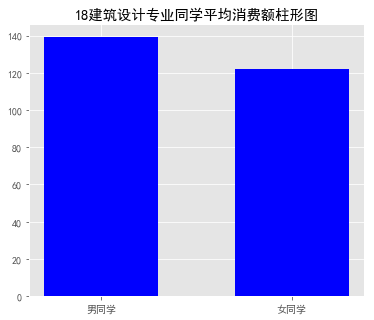

In [194]:
# # 3.1.3层示某一专业不同性别学生群体人均消费对比柱形图
# 5.根据数值绘制柱形图对比不同性别学生人均消费情况

plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
fig=plt.figure(figsize=(6,5))
x=[0,1]
y =[Major__m_shopping_mean , Major__f_shopping_mean]
plt.xticks(np.arange(2), ('男同学','女同学'), rotation=0)#rotation控制倾斜角度
plt.bar(x,y,width=0.6, color='blue')
plt.title('18建筑设计专业同学平均消费额柱形图')
plt.show()

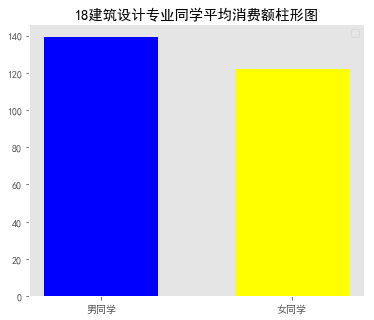

In [192]:
# # 3.1.3展示某一专业不同性别学生群体人均消费对比柱形图
# 5.根据数值绘制柱形图对比不同性别学生人均消费情况

plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号

fig=plt.figure(figsize=(6,5))
x1=0
x2=1
y1=Major__m_shopping_mean 
y2 = Major__f_shopping_mean
plt.xticks(np.arange(2), ('男同学','女同学'), rotation=0)#rotation控制倾斜角度
plt.legend(["red","Blue"])
plt.grid()

plt.bar(x1,y1,width=0.6, color='blue')
plt.bar(x2,y2,width=0.6, color='yellow')
plt.title('18建筑设计专业同学平均消费额柱形图')
# plt.savefig('柱状图.png')
plt.show()

In [176]:
# 任务3.2根据学生的整体校园消费行为，
# 选择合适的特征，构建聚类模型，分析每一类学生群体的消费特点

# 1导入库，选取数据
data_ana1=data5
# data_ana1.shape

# 2构建特征：Dep,Money,FundMoney,CardCount,Date
2.1
ana1_selection = data_ana1.loc[:,['Money','CardCount','hour','Sex']]
ana1_selection_drop=ana1_selection.dropna(axis = 0)

2.2#用函数方式将男表示为1，女表示为0；
def fun(x):
    if x == '男':
        return 1
    else:
        return 0
 
ana1_selection_drop['Sex']= ana1_selection_drop['Sex'].apply(lambda x: fun(x))
ana1_selection_drop['Sex']

# 3.数据标准化
ana4_std = StandardScaler().fit_transform(ana1_selection_drop)             # 数据标准化
ana4_std 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[ 0.49752258, -2.19691313,  1.23897938,  1.22602118],
       [-0.05846624, -2.19202719, -0.90053325,  1.22602118],
       [ 1.13293836, -2.27997404,  0.76353213,  1.22602118],
       ..., 
       [-0.51914268, -0.62852774, -1.37598051, -0.81564659],
       [ 0.33866863, -0.6236418 ,  0.05036125, -0.81564659],
       [-0.53502808, -0.65784336,  0.52580851, -0.81564659]])

In [182]:
# 5.k_means聚类分析
kmeans_model = KMeans(n_clusters=5).fit(ana4_std)   # K-means聚类分析
print('done')

done


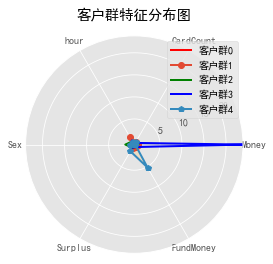

In [186]:
# 6.绘制雷达图

plot(kmeans_model, ana1_selection.columns)    # 绘制客户分群结果

D:\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done


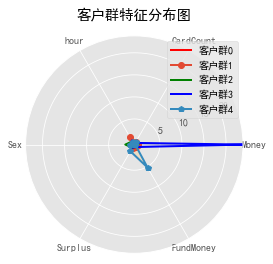

In [185]:
# 测试
# 选择合适的特征，构建聚类模型，分析每一类学生群体的消费特点

# 1导入库，选取数据
data_ana1=data5
# data_ana1.shape

# 2构建特征：Dep,Money,FundMoney,CardCount,Date
2.1
ana1_selection = data_ana1.loc[:,['Money','CardCount','hour','Sex','Surplus','FundMoney']]
ana1_selection_drop=ana1_selection.dropna(axis = 0)

2.2#用函数方式将男表示为1，女表示为0；
def fun(x):
    if x == '男':
        return 1
    else:
        return 0
 
ana1_selection_drop['Sex']= ana1_selection_drop['Sex'].apply(lambda x: fun(x))
ana1_selection_drop['Sex']

# 3.数据标准化
ana4_std = StandardScaler().fit_transform(ana1_selection_drop)             # 数据标准化
# ana4_std 



# 5.k_means聚类分析
kmeans_model = KMeans(n_clusters=5).fit(ana4_std)   # K-means聚类分析
print('done')



# 6.绘制雷达图

plot(kmeans_model, ana1_selection.columns)    # 绘制客户分群结果